<a href="https://colab.research.google.com/github/rubypnchl/Deep-Learning/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [46]:
import tensorflow as tf

In [47]:
print(tf.__version__)

2.15.0


### import some basic libraries

In [48]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [59]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Divide the dataset into independent and dependent features

In [60]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [61]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Feature Engineering

In [63]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

### Concatenate the above variables: geography and gender with dataframe

In [66]:
X=X.drop(['Geography','Gender'],axis=1)


In [67]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [68]:
X=pd.concat([X,geography,gender],axis=1)


In [69]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Splitting the dataset into Training and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [72]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [73]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [75]:
X_train.shape

(8000, 11)

In [76]:
X_test.shape

(2000, 11)

### Part 2: Create the ANN

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU,ELU
from tensorflow.keras.layers import Dropout

### Initialize the ANN

In [78]:
classifier=Sequential()

### Adding the input layer

In [79]:
classifier.add(Dense(units=11,activation='relu'))

### Adding first Hidden layer

In [80]:
classifier.add(Dense(units=7,activation='relu'))

### Adding the second Hidden Layer

In [81]:
classifier.add(Dense(units=6,activation='relu'))

### Adding the output layer

In [83]:
classifier.add(Dense(1,activation='sigmoid'))

In [114]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Adjusting learning rate is possible in adam which is optional but can be shown in the following line code:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [86]:
## the line of code epochs runs for so long even if not needed therefore we need early stopping
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=0,epochs=1000)

Epoch 1/1000
168/168 [==============================] - 4s 12ms/step - loss: 0.5712 - accuracy: 0.7248 - val_loss: 0.4846 - val_accuracy: 0.7955
Epoch 2/1000
168/168 [==============================] - 1s 7ms/step - loss: 0.4597 - accuracy: 0.7983 - val_loss: 0.4559 - val_accuracy: 0.8042
Epoch 3/1000
168/168 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.8128 - val_loss: 0.4406 - val_accuracy: 0.8042
Epoch 4/1000
168/168 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8194 - val_loss: 0.4330 - val_accuracy: 0.8084
Epoch 5/1000
168/168 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8252 - val_loss: 0.4265 - val_accuracy: 0.8205
Epoch 6/1000
168/168 [==============================] - 1s 5ms/step - loss: 0.4018 - accuracy: 0.8278 - val_loss: 0.4189 - val_accuracy: 0.8239
Epoch 7/1000
168/168 [==============================] - 1s 4ms/step - loss: 0.3921 - accuracy: 0.8362 - val_loss: 0.4082 - val_accuracy

KeyboardInterrupt: 

### Early Stopping

In [115]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False,)
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 9s 13ms/step - loss: 0.5481 - accuracy: 0.7738 - val_loss: 0.4718 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4868 - accuracy: 0.7957 - val_loss: 0.4488 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4637 - accuracy: 0.7962 - val_loss: 0.4388 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4501 - accuracy: 0.7970 - val_loss: 0.4302 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.7985 - val_loss: 0.4208 - val_accuracy: 0.7967
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4261 - accuracy: 0.8084 - val_loss: 0.4043 - val_accuracy: 0.8194
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4094 - accuracy: 0.8218 - val_loss: 0.3864 - val_accuracy

In [116]:
history=model_history.history.keys()
history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot summary history for Accuracy

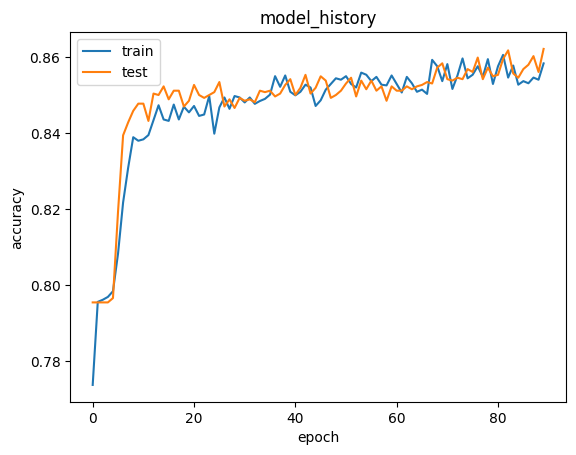

In [117]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Plot Summary history for loss

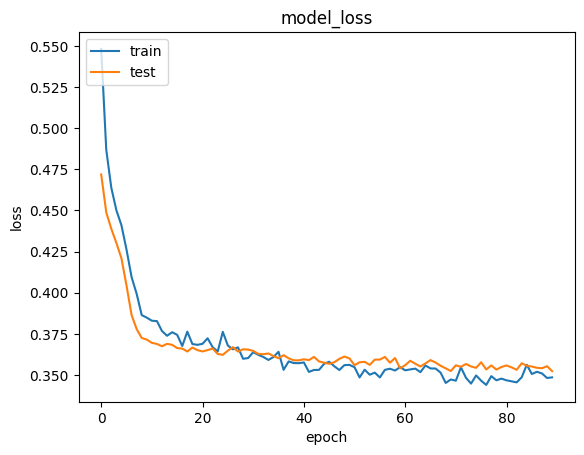

In [118]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Part 3: Making the predictions and evaluating the model

#### Predicting the Test set Results

In [119]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


### Make the Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1531,   64],
       [ 209,  196]])

### Calculate the Accuracy

In [121]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8635

### Get The weights

In [122]:
classifier.get_weights()

[array([[-0.15348467,  0.04905612, -0.03867127, -0.13139623, -0.38750362,
          0.09266696,  0.01246854, -0.10445212, -0.3725427 ,  0.28988004,
          0.01846945],
        [-0.99523693, -0.36517656,  0.6766688 ,  0.248605  ,  0.36339378,
          1.0354966 , -0.2531826 ,  0.28886533,  0.6557235 ,  0.66796386,
          0.16207951],
        [-0.20172386, -0.03872103, -0.11651628,  0.03377106,  0.120107  ,
         -0.26748818,  0.3243135 ,  0.15658447,  0.20051655, -0.00797934,
          0.11110882],
        [-0.11936828, -0.3393945 ,  0.31434843,  0.7132918 ,  0.39912334,
         -0.29661205, -0.5453564 , -0.815043  ,  0.48177895,  0.05027048,
          0.03925794],
        [ 0.27071533,  0.10232023, -0.62603855,  0.6302025 , -0.29787698,
          0.30407655, -0.17211355, -1.0462817 , -0.17338498,  0.44385356,
          0.87278825],
        [-0.25170043,  0.55397147, -0.22621311, -0.02008484, -0.36972174,
         -0.114177  , -0.35850888, -0.05689538,  0.09422025, -0.1092515

# The above code is complete in itself. The next part is not essential but can be added to hiddeb layers:Dropout Layer

In [113]:
classifier=Sequential()
classifier.add(Dense(units=11,activation='relu')) ##input layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2)) #at hidden layer 1
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3)) #at Hidden layer 2
classifier.add(Dense(1,activation='sigmoid'))

### After running this section go to classifer.compile function and and follow the steps further in the above code to run the model

# New Section